This data set from https://archive.ics.uci.edu/ml/datasets/Heart+Disease contains 76 attributes and 303 lines of patient data for building models around heart disease. 

Note: The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. 

In [1]:
import pandas as pd
from pandas import *
import numpy as np
from numpy import *
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from data_cleaning import get_clean_df, clean_df

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 500)

In [2]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.info("Debug mode enabled in this notebook")

INFO:root:Debug mode enabled in this notebook


# Pull data

`va_df`: Data donated by V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D. 

In [3]:
va_df = get_clean_df(raw_path ='processed.va.txt', use_cache=False)

print("Got {:,} rows, with {} columns:".format(*va_df.shape))
va_df.dtypes

DEBUG:data_cleaning:Cleaning HD data


Got 200 rows, with 14 columns:


age            int64
sex            int64
pain           int64
BP           float64
chol         float64
fbs          float64
ecg            int64
maxhr        float64
exang        float64
eist         float64
slope        float64
vessels      float64
thal         float64
diagnosis      int64
dtype: object

# Data Exploration

In [4]:
# Top 10 most frequent in each column
topN = 10
for col in va_df.columns:
    vc = va_df[col].value_counts(dropna=False)
    print(f"-- {col} --\n{vc.head(topN)}\n\n")

-- age --
63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
Name: age, dtype: int64


-- sex --
1    194
0      6
Name: sex, dtype: int64


-- pain --
4    131
3     47
2     14
1      8
Name: pain, dtype: int64


-- BP --
NaN       56
 120.0    16
 130.0    15
 140.0    10
 150.0     9
 110.0     9
 160.0     8
 122.0     6
 142.0     5
 144.0     4
Name: BP, dtype: int64


-- chol --
 0.0      49
NaN        7
 220.0     4
 258.0     4
 203.0     4
 186.0     3
 214.0     3
 223.0     3
 240.0     3
 219.0     3
Name: chol, dtype: int64


-- fbs --
 0.0    125
 1.0     68
NaN       7
Name: fbs, dtype: int64


-- ecg --
1    93
0    80
2    27
Name: ecg, dtype: int64


-- maxhr --
NaN       53
 140.0    12
 120.0    12
 110.0     8
 112.0     6
 130.0     6
 100.0     4
 105.0     4
 118.0     4
 160.0     4
Name: maxhr, dtype: int64


-- exang --
 1.0    95
NaN     53
 0.0    52
Name: exang, dtype: int64


-- eist --
NaN     56
 0.0    40
 2.0  

In [5]:
va_df

,age,sex,pain,BP,chol,fbs,ecg,maxhr,exang,eist,slope,vessels,thal,diagnosis
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
5,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,NaN,NaN,0
6,65,1,4,150.0,236.0,1.0,1,105.0,1.0,0.0,NaN,NaN,NaN,3
7,60,1,3,180.0,0.0,0.0,1,140.0,1.0,1.5,2.0,NaN,NaN,0
8,60,1,3,120.0,0.0,NaN,0,141.0,1.0,2.0,1.0,NaN,NaN,3
9,60,1,2,160.0,267.0,1.0,1,157.0,0.0,0.5,2.0,NaN,NaN,1


In [6]:
#dropped due to missing data (75% + missing)
va_df = va_df.drop(['thal','vessels','slope'], axis = 1)

In [7]:
#Fill na values with mean of the column
va_df_filled = va_df.fillna(va_df.mean())


writer = pd.ExcelWriter('cleaned_va.xlsx')
va_df_filled.to_excel(writer,'Sheet1')
writer.save()

In [8]:
va_df_filled['sex'].value_counts()

1    194
0      6
Name: sex, dtype: int64

59.35


/Users/jak122/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/jak122/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


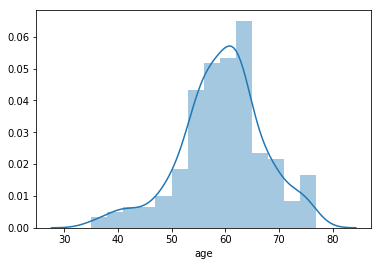

In [9]:
print(va_df_filled['age'].mean())
sns.distplot(va_df_filled["age"])

/Users/jak122/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


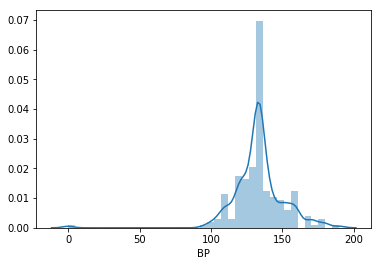

In [10]:
sns.distplot(va_df_filled["BP"])

/Users/jak122/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


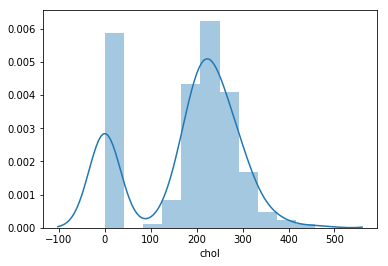

In [11]:
sns.distplot(va_df_filled["chol"])

In [12]:
va_df_filled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,200.0,59.350000,7.811697,35.0,55.00,60.000000,64.0,77.0
sex,200.0,0.970000,0.171015,0.0,1.00,1.000000,1.0,1.0
pain,200.0,3.505000,0.795701,1.0,3.00,4.000000,4.0,4.0
BP,200.0,133.763889,18.257507,0.0,125.75,133.763889,140.0,190.0
chol,200.0,178.746114,112.011633,0.0,129.25,214.000000,254.5,458.0
fbs,200.0,0.352332,0.470440,0.0,0.00,0.000000,1.0,1.0
ecg,200.0,0.735000,0.683455,0.0,0.00,1.000000,1.0,2.0
maxhr,200.0,122.795918,18.835692,69.0,112.00,122.795918,130.0,180.0
exang,200.0,0.646259,0.410940,0.0,0.00,0.646259,1.0,1.0
eist,200.0,1.320833,0.937755,-0.5,1.00,1.320833,2.0,4.0


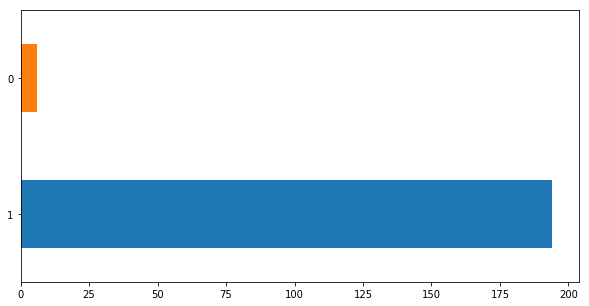

In [13]:
data = va_df_filled["sex"].value_counts()
ax = data.plot.barh(figsize=(10, 5))

# Variable Selection


In [14]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm


X = va_df_filled.iloc[:,0:9]
y = va_df_filled.diagnosis


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  age                            with p-value 3.71221e-05
Add  exang                          with p-value 0.00121711
resulting features:
['age', 'exang']


/Users/jak122/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


# Building the model

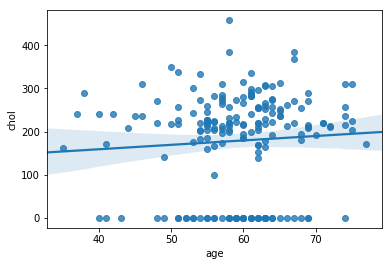

In [15]:
# sns.regplot(x=va_df_filled['age'], y=va_df['diagnosis'])
sns.regplot(x=va_df_filled['age'], y=va_df['chol'])
# sns.regplot(x=va_df_filled['age'], y=va_df['maxhr'])
# sns.regplot(x=va_df_filled['age'], y=va_df['BP'])

In [16]:
# linear regression 
x = va_df_filled[['age','exang']]
y = va_df['diagnosis']

model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     186.3
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           3.09e-46
Time:                        15:44:43   Log-Likelihood:                -311.18
No. Observations:                 200   AIC:                             626.4
Df Residuals:                     198   BIC:                             632.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0192      0.003      7.498      0.0

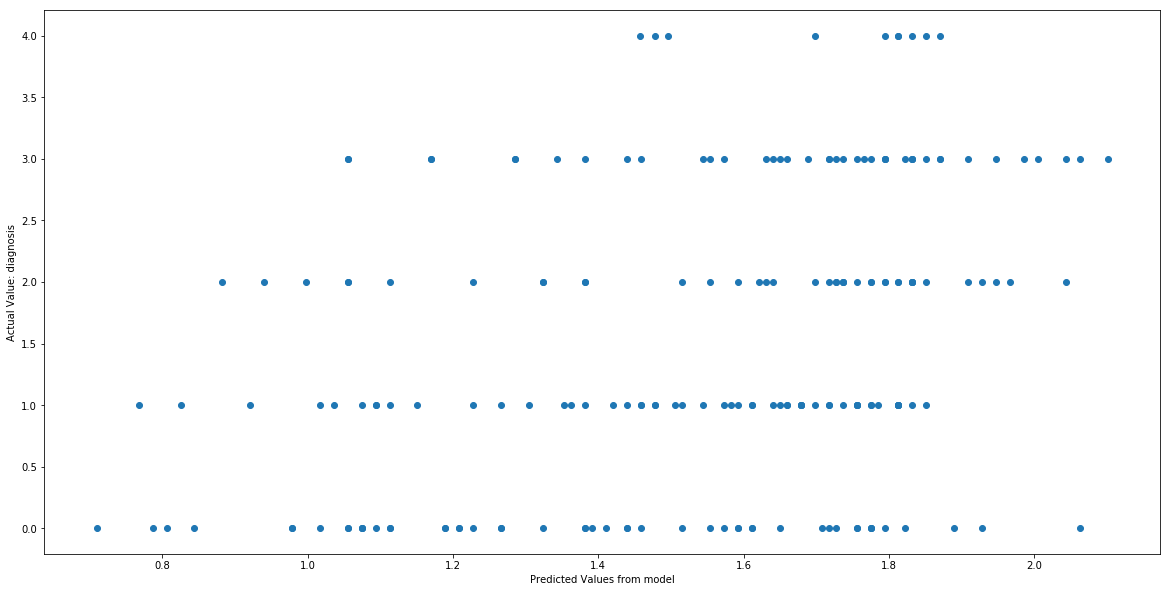

In [17]:
import matplotlib.pyplot as plt

predictions = model.predict(x)
plt.figure(figsize = (20,10))
plt.scatter(predictions, y)
plt.xlabel("Predicted Values from model")
plt.ylabel("Actual Value: diagnosis")
plt.show()

In [18]:
# from sklearn.cross_validation import cross_val_score, cross_val_predict
# from sklearn import metrics

# #Perform 10-fold cross validation
# scores = cross_val_score(model, x, y, cv=10)
# print("Cross-validated scores: ", scores)


# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# # Make cross validated predictions
# predictions = cross_val_predict(model, X, Y, cv=10)

# plt.figure(figsize=(10,10))
# plt.scatter(Y, predictions)
# plt.xlabel("Prices: $Y_i$")
# plt.ylabel("Predicted prices: $\hat{Y}_i$")
# plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

# Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

# accuracy = metrics.r2_score(Y, predictions)
# print("Cross-Predicted Accuracy: ", accuracy)

In [19]:
#double check that no null values
va_df_filled = va_df_filled[pd.notnull(va_df_filled['age'])]
va_df_filled = va_df_filled[pd.notnull(va_df_filled['exang'])]
va_df_filled = va_df_filled[pd.notnull(va_df_filled['diagnosis'])]

#diagnosis of heart disease (angiographic disease status) 
# -- Value 0: < 50% diameter narrowing 
# -- Value 1: > 50% diameter narrowing 
va_df_filled['predict'] = np.where(va_df_filled['diagnosis'] < 1, va_df_filled['diagnosis'], 1)

#logistic 
va_df_filled_org = va_df_filled[['predict','age','exang']]
# va_df_filled_org['intercept'] = 1.0
va_df_filled_org = va_df_filled_org.astype(int)

va_df_filled_org.head()

,predict,age,exang
0,1,63,1
1,0,44,0
2,1,60,1
3,1,55,1
4,0,66,1


In [20]:
X = va_df_filled_org[va_df_filled_org.columns[1:]]
y = va_df_filled_org['predict']

In [21]:
logit = sm.Logit(y, X)

In [22]:
#fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.521870
         Iterations 6


In [23]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                predict   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Thu, 06 Dec 2018   Pseudo R-squ.:                 0.08083
Time:                        15:44:44   Log-Likelihood:                -104.37
converged:                       True   LL-Null:                       -113.55
                                        LLR p-value:                 1.832e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0100      0.003      2.912      0.004       0.003       0.017
exang          1.3314      0.371      3.584      0.000       0.603       2.059


In [24]:
# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OddsRatio'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
print(np.exp(conf))

           2.5%     97.5%  OddsRatio
age    1.003287  1.016930   1.010086
exang  1.828328  7.841596   3.786425


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state = np.random)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
y_pred = logreg.predict(X_test)
print('Accuracy: {:.2f}'.format(logreg.score(X_test,y_test)))

Accuracy: 0.75


In [83]:
from sklearn.metrics import confusion_matrix

cf_mat = confusion_matrix(y_test,y_pred)
print(cf_mat)

[[ 0 15]
 [ 0 45]]
